In [1]:
# import libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
# read csv
df=pd.read_csv("travel_insurance.csv")

In [3]:
# questions
#Are there differences in the travel habits between customers and non-customers?
#What is the typical profile of customers and non-customers?

# EDA

In [4]:
df.head()

,Age,Employment Type,GraduateOrNot,AnnualIncome,FamilyMembers,ChronicDiseases,FrequentFlyer,EverTravelledAbroad,TravelInsurance
0,31,Government Sector,Yes,400000,6,1,No,No,0
1,31,Private Sector/Self Employed,Yes,1250000,7,0,No,No,0
2,34,Private Sector/Self Employed,Yes,500000,4,1,No,No,1
3,28,Private Sector/Self Employed,Yes,700000,3,1,No,No,0
4,28,Private Sector/Self Employed,Yes,700000,8,1,Yes,No,0


In [5]:
# check data types
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1987 entries, 0 to 1986
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   Age                  1987 non-null   int64 
 1   Employment Type      1987 non-null   object
 2   GraduateOrNot        1987 non-null   object
 3   AnnualIncome         1987 non-null   int64 
 4   FamilyMembers        1987 non-null   int64 
 5   ChronicDiseases      1987 non-null   int64 
 6   FrequentFlyer        1987 non-null   object
 7   EverTravelledAbroad  1987 non-null   object
 8   TravelInsurance      1987 non-null   int64 
dtypes: int64(5), object(4)
memory usage: 139.8+ KB


In [6]:
# create customer df
cust=df.loc[df['TravelInsurance']==1]
cust.head()

,Age,Employment Type,GraduateOrNot,AnnualIncome,FamilyMembers,ChronicDiseases,FrequentFlyer,EverTravelledAbroad,TravelInsurance
2,34,Private Sector/Self Employed,Yes,500000,4,1,No,No,1
7,31,Private Sector/Self Employed,Yes,1350000,3,0,Yes,Yes,1
8,28,Private Sector/Self Employed,Yes,1450000,6,1,Yes,Yes,1
11,26,Private Sector/Self Employed,Yes,1400000,5,0,Yes,Yes,1
12,32,Government Sector,Yes,850000,6,0,No,No,1


In [7]:
len(df)

1987

In [8]:
# how many customers are there?
len(cust)

710

In [9]:
# % of total users? 
len(cust)/len(df)

0.3573225968797182

In [10]:
# descriptive stats of customers
cust.describe()

,Age,AnnualIncome,FamilyMembers,ChronicDiseases,TravelInsurance
count,710.000000,7.100000e+02,710.000000,710.000000,710.0
mean,29.888732,1.133239e+06,4.925352,0.288732,1.0
std,3.331732,3.748447e+05,1.678304,0.453493,0.0
min,25.000000,3.000000e+05,2.000000,0.000000,1.0
25%,27.000000,8.000000e+05,4.000000,0.000000,1.0
50%,30.000000,1.250000e+06,5.000000,0.000000,1.0
75%,33.000000,1.400000e+06,6.000000,1.000000,1.0
max,35.000000,1.800000e+06,9.000000,1.000000,1.0


In [11]:
# create non-customer df 
non_cust=df.loc[df['TravelInsurance']==0]
non_cust.head()

,Age,Employment Type,GraduateOrNot,AnnualIncome,FamilyMembers,ChronicDiseases,FrequentFlyer,EverTravelledAbroad,TravelInsurance
0,31,Government Sector,Yes,400000,6,1,No,No,0
1,31,Private Sector/Self Employed,Yes,1250000,7,0,No,No,0
3,28,Private Sector/Self Employed,Yes,700000,3,1,No,No,0
4,28,Private Sector/Self Employed,Yes,700000,8,1,Yes,No,0
5,25,Private Sector/Self Employed,No,1150000,4,0,No,No,0


In [12]:
# how many non-customers are there?
len(non_cust)

1277

In [13]:
df['Age'].unique()

array([31, 34, 28, 25, 33, 26, 32, 29, 35, 30, 27], dtype=int64)

In [14]:
# % of total? 
len(non_cust)/len(df)

0.6426774031202819

In [15]:
# descriptive statistics
non_cust.describe()

,Age,AnnualIncome,FamilyMembers,ChronicDiseases,TravelInsurance
count,1277.000000,1.277000e+03,1277.000000,1277.000000,1277.0
mean,29.517619,8.212999e+05,4.657009,0.271731,0.0
std,2.644396,3.288989e+05,1.562634,0.445026,0.0
min,25.000000,3.000000e+05,2.000000,0.000000,0.0
25%,28.000000,5.500000e+05,4.000000,0.000000,0.0
50%,29.000000,8.000000e+05,4.000000,0.000000,0.0
75%,31.000000,1.100000e+06,6.000000,1.000000,0.0
max,35.000000,1.750000e+06,9.000000,1.000000,0.0


35.7% of users buy travel insurance and 64.3% do not. The average customer and non-customer have similar ages and family members.

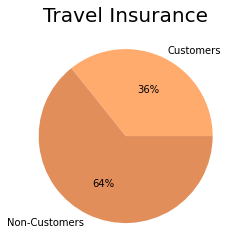

In [16]:
# define values
data = [len(cust), len(non_cust)]
labels = ['Customers', 'Non-Customers']
colors = sns.color_palette('copper_r')

# pie chart
plt.pie(data, labels = labels, colors = colors, autopct='%.0f%%')
plt.title ('Travel Insurance', size=20)
plt.show()

# Annual Income?

In [17]:
cust['AnnualIncome'].mean()

1133239.4366197183

In [18]:
non_cust['AnnualIncome'].mean()

821299.9216914644

In [19]:
cust['AnnualIncome'].mean() - non_cust['AnnualIncome'].mean()

311939.51492825395

In [20]:
cust['AnnualIncome'].median()

1250000.0

In [21]:
non_cust['AnnualIncome'].median()

800000.0

The average customer makes 1,133,239 - more than 1 million dollars! On the other hand, the average non-customer makes 821,299 - an impressive 6 digits, but 311,939 less than the average customer.

# Ever Travelled Abroad?

In [22]:
cust['EverTravelledAbroad'].value_counts()

No     412
Yes    298
Name: EverTravelledAbroad, dtype: int64

In [23]:
non_cust['EverTravelledAbroad'].value_counts()

No     1195
Yes      82
Name: EverTravelledAbroad, dtype: int64

In [24]:
cust[cust.EverTravelledAbroad == 'Yes'].shape[0]/len(cust)

0.4197183098591549

In [25]:
cust[cust.EverTravelledAbroad == 'No'].shape[0]/len(cust)

0.5802816901408451

In [26]:
non_cust[non_cust.EverTravelledAbroad == 'Yes'].shape[0]/len(non_cust)

0.06421299921691465

In [27]:
non_cust[non_cust.EverTravelledAbroad == 'No'].shape[0]/len(non_cust)

0.9357870007830854

Customers are more likely to have travelled abroad than non-customers: 42% of customers travelled abroad versus 6.4% of non-customers travelled abroad. This is not surprising as customers make more money than non-customers and can afford to travel internationally. Furthermore, international travel can be stressful and travel insurance can help alleviate that stress.

# College Graduate?

In [28]:
cust['GraduateOrNot'].value_counts()

Yes    611
No      99
Name: GraduateOrNot, dtype: int64

In [29]:
non_cust['GraduateOrNot'].value_counts()

Yes    1081
No      196
Name: GraduateOrNot, dtype: int64

In [30]:
cust[cust.GraduateOrNot== 'Yes'].shape[0]/len(cust)

0.8605633802816901

In [31]:
cust[cust.GraduateOrNot== 'No'].shape[0]/len(cust)

0.13943661971830987

In [32]:
non_cust[non_cust.GraduateOrNot== 'Yes'].shape[0]/len(non_cust)

0.8465152701644479

In [33]:
non_cust[non_cust.GraduateOrNot== 'No'].shape[0]/len(non_cust)

0.1534847298355521

In [34]:
cust[cust.GraduateOrNot== 'Yes'].shape[0]/len(cust) - non_cust[non_cust.GraduateOrNot== 'Yes'].shape[0]/len(non_cust)

0.014048110117242163

Customers have a slightly higher likelihood (1.4%) to be a college graduate. Is this statistically significant?

# Employment Type?

In [35]:
cust['Employment Type'].value_counts()

Private Sector/Self Employed    570
Government Sector               140
Name: Employment Type, dtype: int64

In [36]:
non_cust['Employment Type'].value_counts()

Private Sector/Self Employed    847
Government Sector               430
Name: Employment Type, dtype: int64

In [37]:
cust[cust['Employment Type']== 'Private Sector/Self Employed'].shape[0]/len(cust)

0.8028169014084507

In [38]:
cust[cust['Employment Type']== 'Government Sector'].shape[0]/len(cust)

0.19718309859154928

In [39]:
non_cust[non_cust['Employment Type']== 'Private Sector/Self Employed'].shape[0]/len(non_cust)

0.66327329678935

In [40]:
non_cust[non_cust['Employment Type']== 'Government Sector'].shape[0]/len(non_cust)

0.33672670321064996

Customers are more likely to be employed in the private sector/self-employed than our non-customers. Meanwhile, our non-customers are more likely to be employed in the government sector than in the private sector/self-employed. Due to the pay gap between the public and private sectors, this finding is in line with the income differences between customers and non-customers.

# Chronic Diseases?

In [41]:
cust['ChronicDiseases'].value_counts()

0    505
1    205
Name: ChronicDiseases, dtype: int64

In [42]:
non_cust['ChronicDiseases'].value_counts()

0    930
1    347
Name: ChronicDiseases, dtype: int64

In [43]:
cust[cust['ChronicDiseases']== 1].shape[0]/len(cust)

0.2887323943661972

In [44]:
cust[cust['ChronicDiseases']== 0].shape[0]/len(cust)

0.7112676056338029

In [45]:
non_cust[non_cust['ChronicDiseases']== 1].shape[0]/len(non_cust)

0.2717306186374315

In [46]:
non_cust[non_cust['ChronicDiseases']== 0].shape[0]/len(non_cust)

0.7282693813625685

In [47]:
cust[cust['ChronicDiseases']== 1].shape[0]/len(cust) - non_cust[non_cust['ChronicDiseases']== 1].shape[0]/len(non_cust)

0.01700177572876571

Customers have a slightly higher likelihood (1.7%) to have a chronic condition. Is this statistically significant?

# Frequent Flyer?

In [48]:
cust['FrequentFlyer'].value_counts()

No     471
Yes    239
Name: FrequentFlyer, dtype: int64

In [49]:
non_cust['FrequentFlyer'].value_counts()

No     1099
Yes     178
Name: FrequentFlyer, dtype: int64

In [50]:
cust[cust['FrequentFlyer']== 'Yes'].shape[0]/len(cust)

0.33661971830985915

In [51]:
cust[cust['FrequentFlyer']== 'No'].shape[0]/len(cust)

0.6633802816901408

In [52]:
non_cust[non_cust['FrequentFlyer']== 'Yes'].shape[0]/len(non_cust)

0.139389193422083

In [53]:
non_cust[non_cust['FrequentFlyer']== 'No'].shape[0]/len(non_cust)

0.860610806577917

Frequent flyers are more likely to purchase travel insurance than non-frequent flyers: 33.7% of frequent flyers purchased insurance versus 14% of non-frequent flyers purchased insurance. Frequent flyers are more familiar with the risks and financial losses that could happen while traveling and therefore, preemptively purchase travel insurance.

# Visualizations

In [54]:
# establish grid
sns.set(rc={'figure.figsize': (12,6)})
sns.set_style('whitegrid')
sns.set_context('notebook')

In [55]:
# what is the relationship between employment type, income, and purchase of travel insurance? 
df_heat=df.pivot_table(index='Employment Type', columns='AnnualIncome', values='TravelInsurance', aggfunc=np.mean)
df_heat

AnnualIncome,300000,350000,400000,450000,500000,550000,600000,650000,700000,750000,...,1300000,1350000,1400000,1450000,1500000,1550000,1650000,1700000,1750000,1800000
Employment Type,,,,,,,,,,,,,,,,,,,,,
Government Sector,0.068182,0.058824,0.153846,NaN,0.162791,0.666667,0.200000,0.571429,0.454545,0.190476,...,0.435897,NaN,NaN,1.0,0.888889,NaN,NaN,NaN,0.250000,NaN
Private Sector/Self Employed,NaN,0.095238,NaN,0.333333,0.280000,0.269231,0.190476,0.187500,0.297619,0.204545,...,0.346154,0.953488,0.915385,1.0,0.972603,1.0,1.0,0.891892,0.272727,1.0


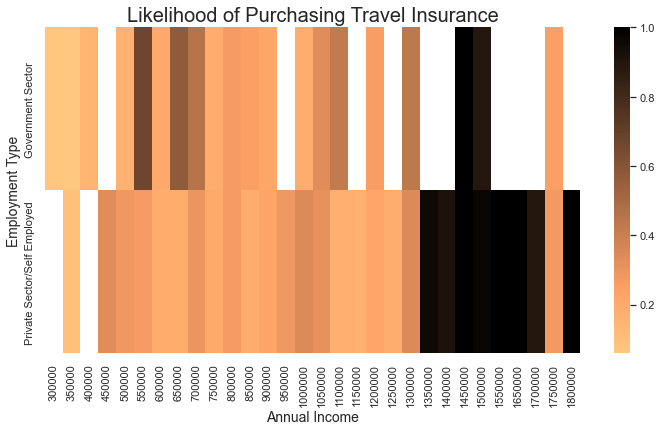

In [56]:
# heat map
sns.color_palette("copper_r", as_cmap=True)
sns.heatmap(df_heat, cmap="copper_r")
plt.title('Likelihood of Purchasing Travel Insurance', size=20)
plt.ylabel('Employment Type', size=14)
plt.xlabel('Annual Income', size=14)
plt.show()

In [57]:
# what is the relationship between age, family size, and purchase of travel insurance? 
df_heat=df.pivot_table(index='Age',columns='FamilyMembers', values='TravelInsurance', aggfunc=np.mean)
df_heat

FamilyMembers,2,3,4,5,6,7,8,9
Age,,,,,,,,
25,0.666667,0.583333,0.628571,0.567568,0.850000,0.714286,0.250000,1.000000
26,0.500000,0.433333,0.513514,0.647059,0.360000,0.500000,0.000000,0.750000
27,0.300000,0.260870,0.281250,0.096774,0.250000,0.133333,0.000000,NaN
28,0.360000,0.222222,0.204082,0.184466,0.162500,0.205128,0.062500,0.466667
29,0.000000,0.333333,0.274510,0.210526,0.166667,0.333333,0.375000,0.222222
30,0.500000,0.368421,0.416667,0.636364,0.444444,0.428571,0.000000,0.500000
31,0.363636,0.385965,0.288462,0.279070,0.358974,0.250000,0.333333,0.166667
32,0.000000,0.333333,0.062500,0.150000,0.166667,0.400000,NaN,0.400000
33,0.111111,0.565217,0.317073,0.424242,0.875000,1.000000,0.800000,0.800000


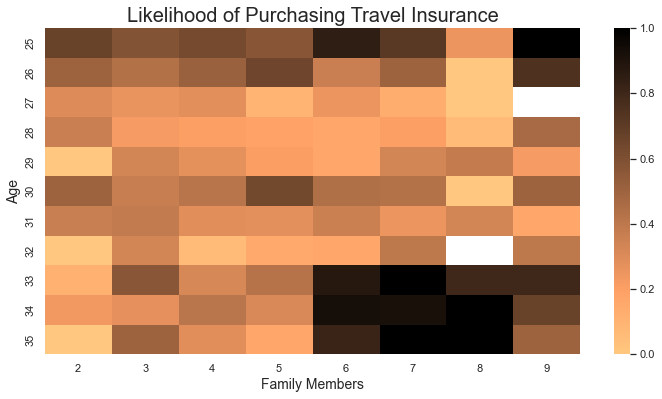

In [58]:
# heat map
sns.color_palette("copper_r", as_cmap=True)
sns.heatmap(df_heat, cmap="copper_r")
plt.title('Likelihood of Purchasing Travel Insurance', size=20)
plt.ylabel('Age', size=14)
plt.xlabel('Family Members', size=14)
plt.show()

In [59]:
# what is the relationship between age, income, and purchase of travel insurance? 
df_heat=df.pivot_table(index='Age', columns='AnnualIncome', values='TravelInsurance', aggfunc=np.mean)
df_heat

AnnualIncome,300000,350000,400000,450000,500000,550000,600000,650000,700000,750000,...,1300000,1350000,1400000,1450000,1500000,1550000,1650000,1700000,1750000,1800000
Age,,,,,,,,,,,,,,,,,,,,,
25,NaN,NaN,NaN,NaN,0.250000,NaN,0.111111,NaN,NaN,0.363636,...,NaN,0.833333,0.944444,NaN,NaN,NaN,NaN,0.891892,1.000000,1.0
26,NaN,NaN,NaN,0.4,0.100000,0.666667,0.090909,NaN,NaN,0.000000,...,0.250000,NaN,0.972973,1.0,0.947368,NaN,NaN,NaN,0.000000,NaN
27,NaN,0.000000,NaN,0.3,0.225806,NaN,0.200000,NaN,NaN,0.000000,...,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN
28,0.082192,NaN,NaN,NaN,0.300000,0.150000,0.250000,0.142857,0.170213,0.160000,...,0.285714,1.000000,0.800000,1.0,NaN,NaN,NaN,NaN,0.000000,NaN
29,NaN,0.181818,NaN,NaN,0.350000,NaN,0.200000,NaN,NaN,NaN,...,NaN,0.909091,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,NaN
30,NaN,NaN,NaN,NaN,0.200000,0.272727,NaN,0.222222,NaN,1.000000,...,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN
31,0.000000,0.000000,0.025,NaN,0.400000,NaN,NaN,NaN,NaN,NaN,...,0.375000,1.000000,0.869565,NaN,0.888889,NaN,1.0,NaN,0.000000,NaN
32,NaN,0.074074,NaN,NaN,NaN,NaN,NaN,0.200000,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,NaN
33,NaN,NaN,0.360,NaN,NaN,0.562500,0.333333,0.777778,0.454545,0.285714,...,NaN,NaN,0.869565,NaN,1.000000,NaN,NaN,NaN,0.666667,NaN


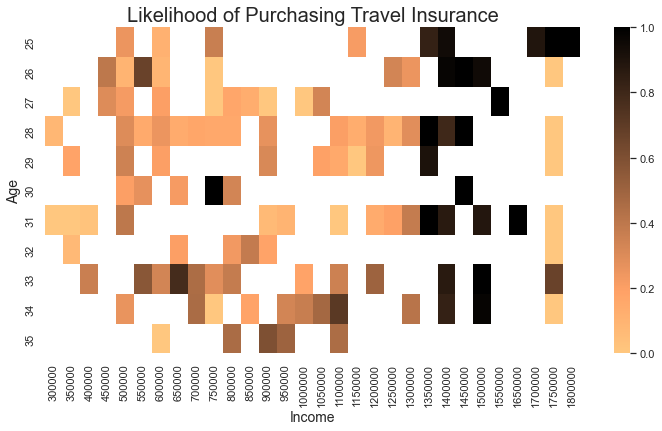

In [60]:
# heat map
sns.color_palette("copper_r", as_cmap=True)
sns.heatmap(df_heat, cmap="copper_r")
plt.title('Likelihood of Purchasing Travel Insurance', size=20)
plt.ylabel('Age', size=14)
plt.xlabel('Income', size=14)
plt.show()

In [61]:
# what is the relationship between age, family size, and purchase of travel insurance? 
df_heat=df.pivot_table(index='FrequentFlyer', columns='EverTravelledAbroad', values='TravelInsurance', aggfunc=np.mean)
df_heat

EverTravelledAbroad,No,Yes
FrequentFlyer,,
No,0.236377,0.707547
Yes,0.365462,0.880952


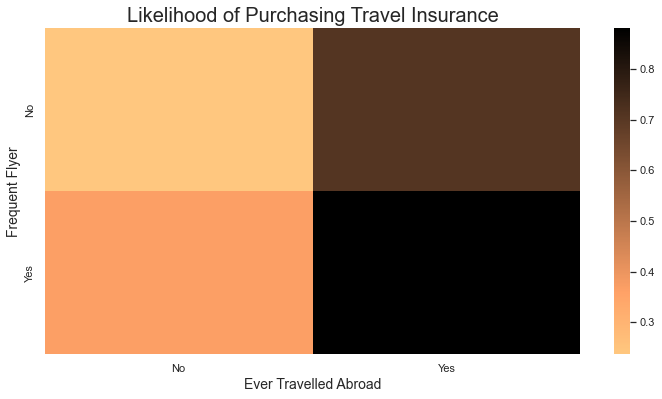

In [62]:
# heat map
sns.color_palette("copper_r", as_cmap=True)
sns.heatmap(df_heat, cmap="copper_r")
plt.title('Likelihood of Purchasing Travel Insurance', size=20)
plt.ylabel('Frequent Flyer', size=14)
plt.xlabel('Ever Travelled Abroad', size=14)
plt.show()

In [63]:
# what is the relationship between the last two variables?
df_heat=df.pivot_table(index='GraduateOrNot', columns='ChronicDiseases', values='TravelInsurance', aggfunc=np.mean)
df_heat

ChronicDiseases,0,1
GraduateOrNot,,
No,0.337900,0.328947
Yes,0.354441,0.378151


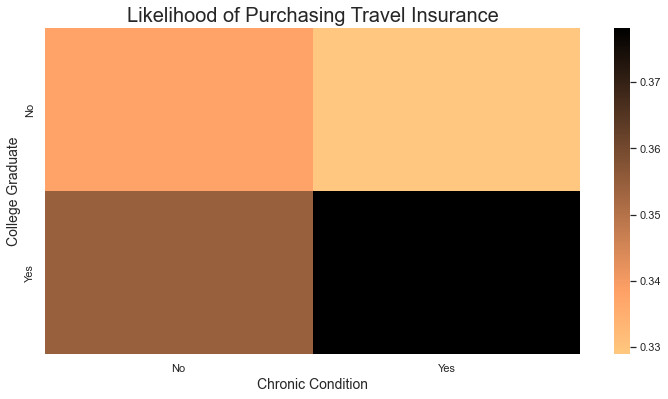

In [64]:
# heat map
col = ['No', 'Yes']
sns.color_palette("copper_r", as_cmap=True)
sns.heatmap(df_heat, cmap="copper_r", xticklabels=col)
plt.title('Likelihood of Purchasing Travel Insurance', size=20)
plt.ylabel('College Graduate', size=14)
plt.xlabel('Chronic Condition', size=14)
plt.show()

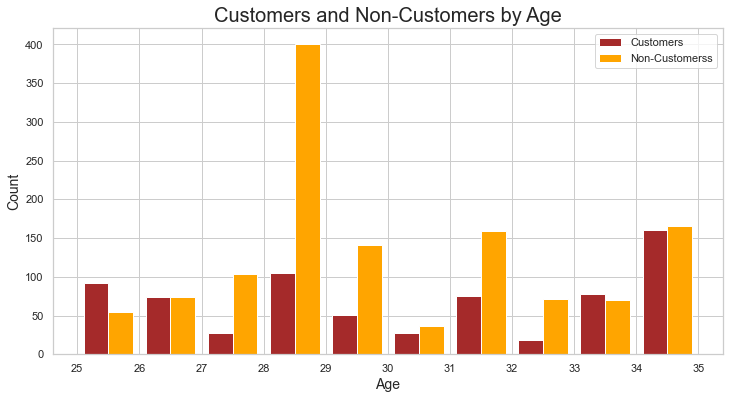

In [65]:
# count of customers and non-customers by age
ax=plt.hist([cust['Age'], non_cust['Age']], color=['Brown','Orange'], label=['Customers','Non-Customerss'])
plt.title("Customers and Non-Customers by Age", size=20)
plt.xlabel('Age', size=14)
plt.ylabel('Count', size=14)
plt.xticks([25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35])
plt.legend()
ax;

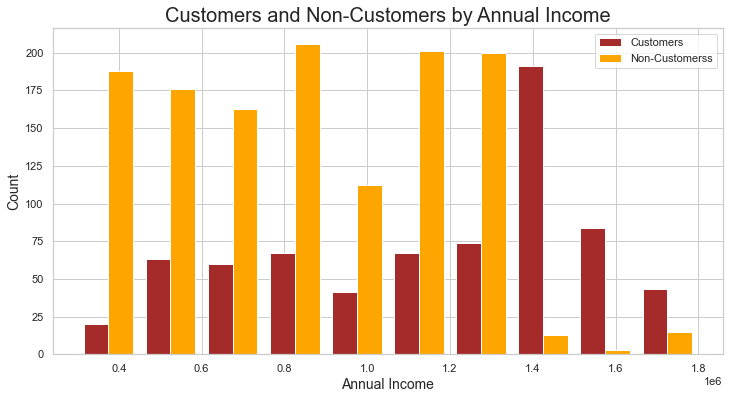

In [66]:
# count of customers and non-customers by income
ax=plt.hist([cust['AnnualIncome'], non_cust['AnnualIncome']], color=['Brown','Orange'], label=['Customers','Non-Customerss'])
plt.title("Customers and Non-Customers by Annual Income", size=20)
plt.xlabel('Annual Income', size=14)
plt.ylabel('Count', size=14)
plt.legend()
ax;